In [1]:
!pip install opencv-python dlib imutils

In [31]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance as dist
from google.colab.output import eval_js
from IPython.display import display, Javascript
import PIL.Image
import io
import base64

# EAR calculator
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

# Inisialisasi model
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
(lStart, lEnd) = (42, 48)
(rStart, rEnd) = (36, 42)

EAR_THRESHOLD = 0.27
EAR_CONSEC_FRAMES = 15
COUNTER = 0

<IPython.core.display.Javascript object>

EAR: 0.40441649748120545
lu kaga ngantuk


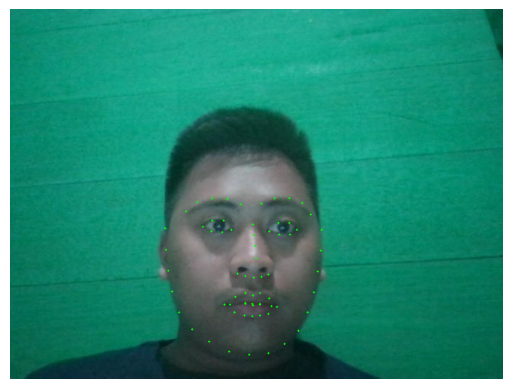

EAR: 0.23726675330788966
lu ngantuk


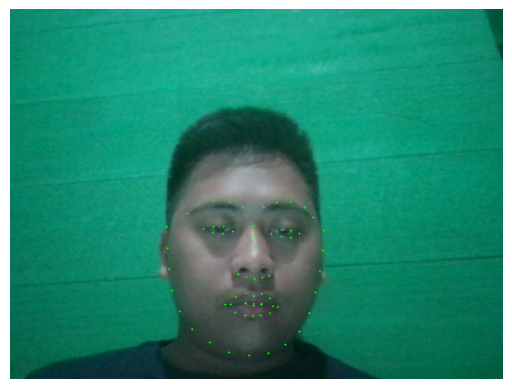

EAR: 0.23997983859646754
lu ngantuk


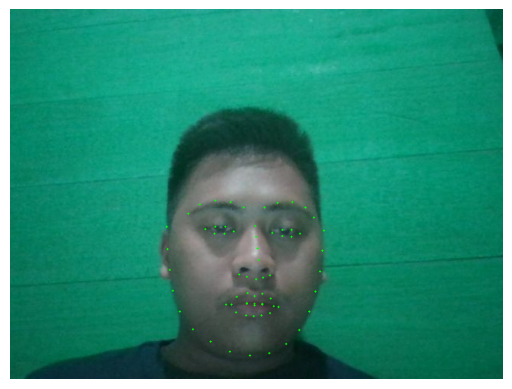

EAR: 0.3091695118045876
lu kaga ngantuk


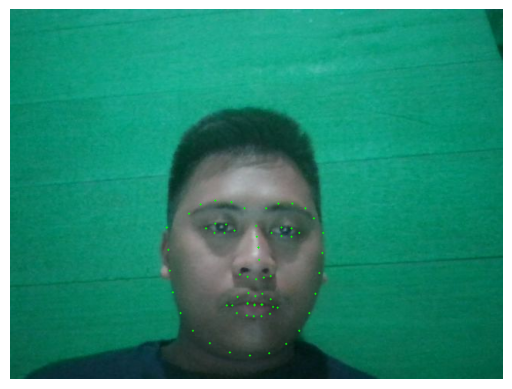

EAR: 0.3185308296370182
lu kaga ngantuk


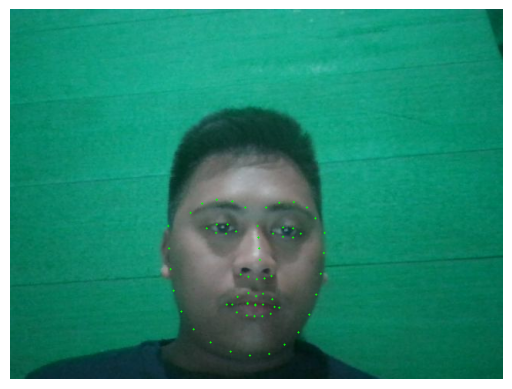

EAR: 0.3602691929509523
lu kaga ngantuk


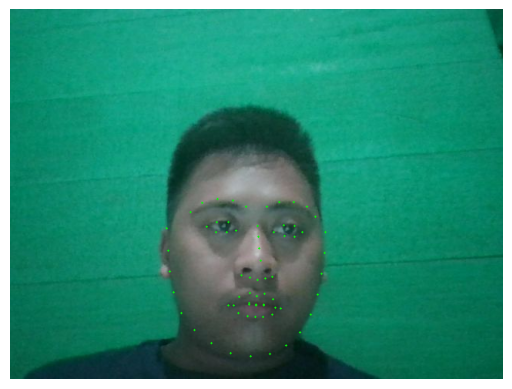

EAR: 0.33314024061172176
lu kaga ngantuk


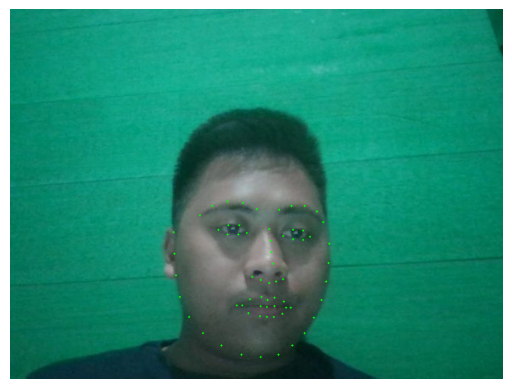

EAR: 0.29991887315205323
lu kaga ngantuk


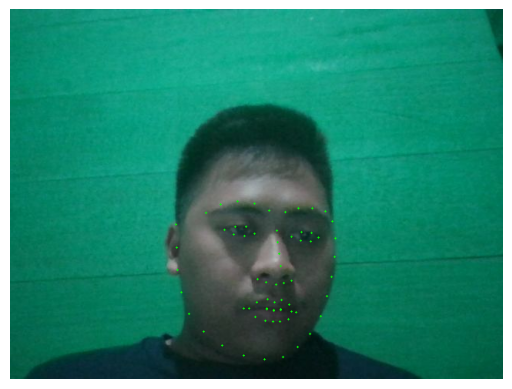

EAR: 0.3045468928204431
lu kaga ngantuk


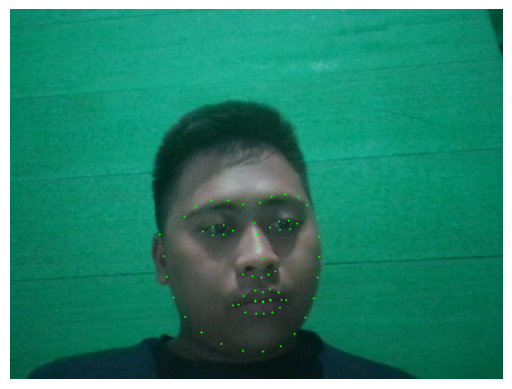

EAR: 0.341191141718919
lu kaga ngantuk


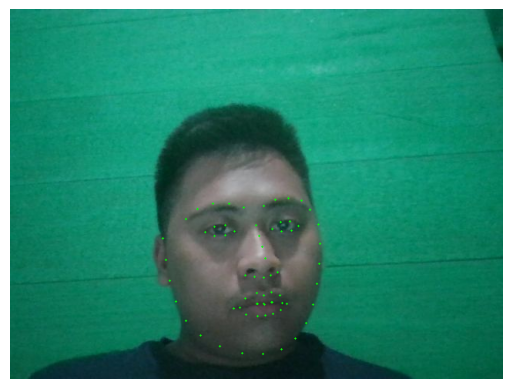

EAR: 0.23736280529310064
lu ngantuk


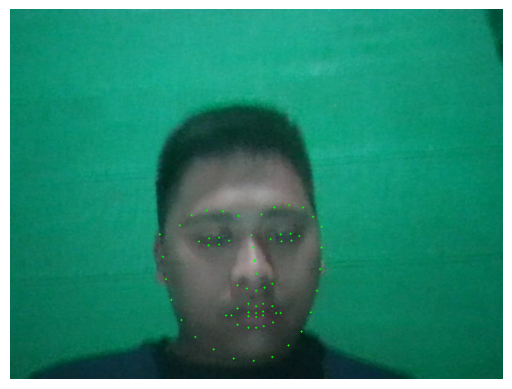

EAR: 0.3501837570771485
lu kaga ngantuk


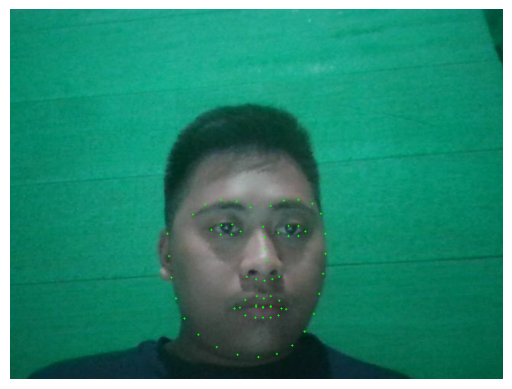

EAR: 0.2010133682747553
lu ngantuk


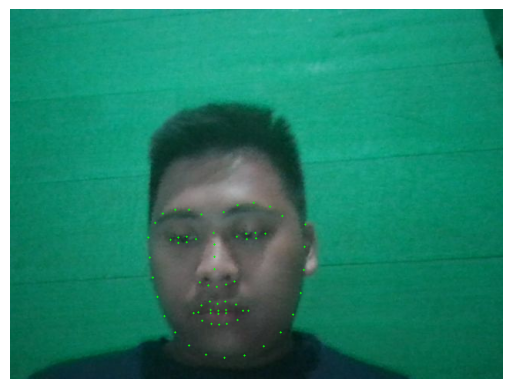

EAR: 0.2360560042578631
lu ngantuk


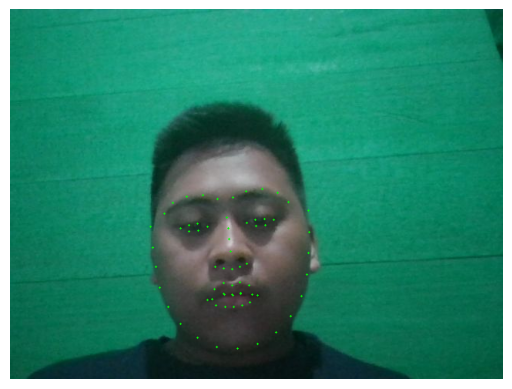

EAR: 0.24095595848699772
lu ngantuk


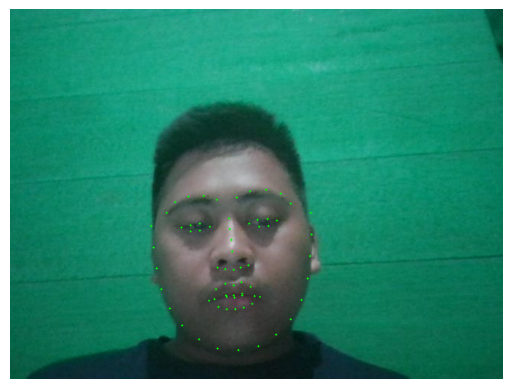

EAR: 0.32471708259255705
lu kaga ngantuk


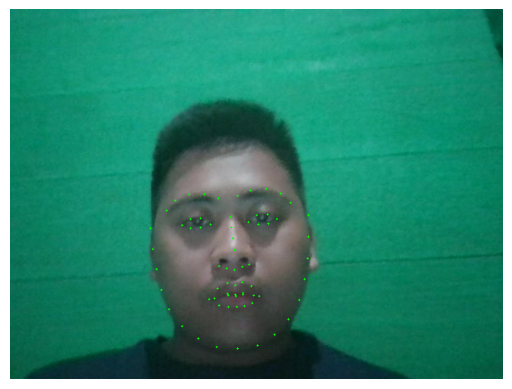

EAR: 0.3429653937328776
lu kaga ngantuk


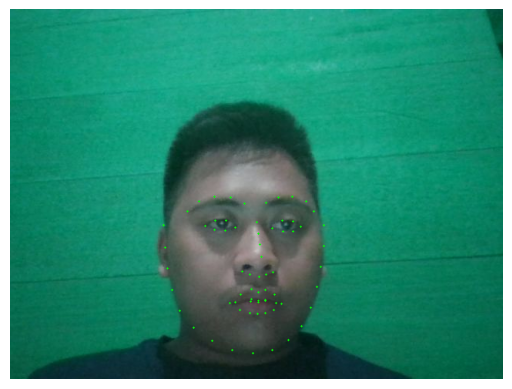

In [36]:
from IPython.display import display, Javascript

js_code = '''
async function startPhotoLoop() {
  let existing = document.querySelector("#custom-capture-container");
  if (existing) existing.remove();

  const devices = await navigator.mediaDevices.enumerateDevices();
  const videoDevices = devices.filter(device => device.kind === 'videoinput');
  let selectedDeviceId = videoDevices[0].deviceId;

  const div = document.createElement('div');
  div.id = "custom-capture-container";
  document.body.appendChild(div);

  const video = document.createElement('video');
  video.style.display = 'block';
  const stream = await navigator.mediaDevices.getUserMedia({
    video: { deviceId: selectedDeviceId }
  });

  div.appendChild(video);
  video.srcObject = stream;
  await video.play();

  google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

  async function captureFrame() {
    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);
    const dataUrl = canvas.toDataURL('image/jpeg', 0.8);
    await google.colab.kernel.invokeFunction('notebook.process_frame', [dataUrl], {});
  }

  // ambil foto tiap 3 detik
  setInterval(captureFrame, 3000);
}

startPhotoLoop();
'''
display(Javascript(js_code))

In [35]:
from google.colab import output
import cv2
import dlib
import numpy as np
from PIL import Image
import base64
import io
import matplotlib.pyplot as plt

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    return (A + B) / (2.0 * C)

(lStart, lEnd) = (42, 48)
(rStart, rEnd) = (36, 42)
EAR_THRESHOLD = 0.25
def process_image(data_url):
    header, encoded = data_url.split(",", 1)
    binary = base64.b64decode(encoded)
    image = Image.open(io.BytesIO(binary)).convert("RGB")
    frame = np.array(image)
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    rects = detector(gray, 0)
    for rect in rects:
        shape = predictor(gray, rect)
        shape_np = np.array([[p.x, p.y] for p in shape.parts()])
        for (x, y) in shape_np:
            cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)
        leftEye = shape_np[lStart:lEnd]
        rightEye = shape_np[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0

        print("EAR:", ear)
        if ear < EAR_THRESHOLD:
            print("lu ngantuk")
        else:
            print("lu kaga ngantuk")
    plt.imshow(frame)
    plt.axis('off')
    plt.show()
def js_callback(data):
    process_image(data)
output.register_callback("notebook.process_frame", js_callback)